In [1]:
import os
from sktime.datasets import load_from_ucr_tsv_to_dataframe
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import RobustScaler
from utils import *

In [2]:
datasets = np.unique([x.split('/')[1] for x in glob.glob(f'representation/*/*')])
datasets

array(['Car', 'ChlorineConcentration', 'FaceAll', 'FreezerSmallTrain',
       'Fungi', 'Ham', 'ItalyPowerDemand', 'MixedShapesSmallTrain',
       'OliveOil', 'Plane', 'SmallKitchenAppliances', 'SmoothSubspace',
       'Symbols', 'WordSynonyms'], dtype='<U22')

In [3]:
method='tsfresh'
run='1'

all_datasets = []

for dataset in datasets:
    print(dataset)
    X_test, y_test = load_from_ucr_tsv_to_dataframe(
    os.path.join('UCRArchive_2018/', f"{dataset}/{dataset}_TEST.tsv")
    )

    scaler = TabularToSeriesAdaptor(RobustScaler())

    X_test = scaler.fit_transform(X_test)
    all_datasets.append(X_test.sample(20))

Car
ChlorineConcentration
FaceAll
FreezerSmallTrain
Fungi
Ham
ItalyPowerDemand
MixedShapesSmallTrain
OliveOil
Plane
SmallKitchenAppliances
SmoothSubspace
Symbols
WordSynonyms


In [4]:
df = pd.concat(all_datasets, axis=0)
df

dim_0
50   0      0.909012
1      0.889925
2      0.87019...
51   0      1.046351
1      1.018959
2      0.99157...
33   0      0.775024
1      0.756495
2      0.73852...
41   0      0.902569
1      0.879961
2      0.85749...
10   0      0.907420
1      0.890439
2      0.87345...
..                                                 ...
399  0     -0.771771
1     -0.758459
2     -0.74229...
435  0     -0.463463
1     -0.459981
2     -0.42966...
624  0     -0.485667
1     -0.483795
2     -0.48011...
1    0     -0.591250
1     -0.556408
2     -0.52034...
300  0     -0.568206
1     -0.534884
2     -0.51595...

[280 rows x 1 columns]

In [5]:
transformations = ["WhiteNoise;0", "WhiteNoise;0.001", "WhiteNoise;0.002", "WhiteNoise;0.005", "WhiteNoise;0.01",
                   "WhiteNoise;0.02", "WhiteNoise;0.05", "WhiteNoise;0.1", "WhiteNoise;0.2", "WhiteNoise;0.5", 
                   "WhiteNoise;1.0", "WhiteNoise;2.0", "WhiteNoise;5.0"]

#transformations = [x.replace('WhiteNoise', 'Constant') for x in transformations]
#transformations = [x.replace('WhiteNoise', 'Scale') for x in transformations][1:]
transformations = [f'Resample;{x}' for x in list(reversed([round(0.9**x, 4) for x in range(7)])) + [round(1.2**x, 4) for x in range(1, 7)]]

transformations

['Resample;0.5314',
 'Resample;0.5905',
 'Resample;0.6561',
 'Resample;0.729',
 'Resample;0.81',
 'Resample;0.9',
 'Resample;1.0',
 'Resample;1.2',
 'Resample;1.44',
 'Resample;1.728',
 'Resample;2.0736',
 'Resample;2.4883',
 'Resample;2.986']

In [6]:
sum_df = df.head(10)

v = []
transform_tsfresh = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False, n_jobs=-1)
for transformation in transformations:
    #print(transformation)
    t = transformation_factory(transformation)
    h = t(sum_df)
    v.append(transform_tsfresh.fit_transform(h))

Feature Extraction: 100%|██████████| 10/10 [00:03<00:00,  2.70it/s]


In [7]:
#tab = transform_tsfresh.fit_transform(t(sum_df))

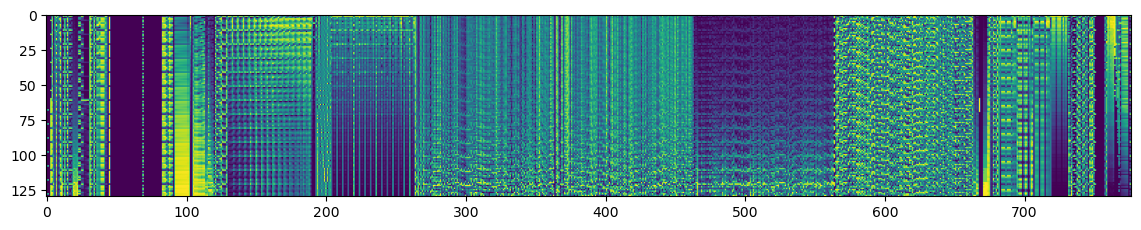

In [8]:
dft = pd.concat(v, axis=0)

scaler = MinMaxScaler()
dft = pd.DataFrame(scaler.fit_transform(dft), columns=dft.columns)

plt.figure(figsize=(14, 10))
plt.imshow(dft)

In [9]:
sum_df = df.head(10)

v = []

for transformation in transformations:
    transform_rocket = Rocket(num_kernels=128, random_state=0)
    #if transform_rocket.is_fitted == False:
    transform_rocket.fit_transform(X_test)
    
    t = transformation_factory(transformation)
    h = t(sum_df)
    v.append(transform_rocket.transform(h))

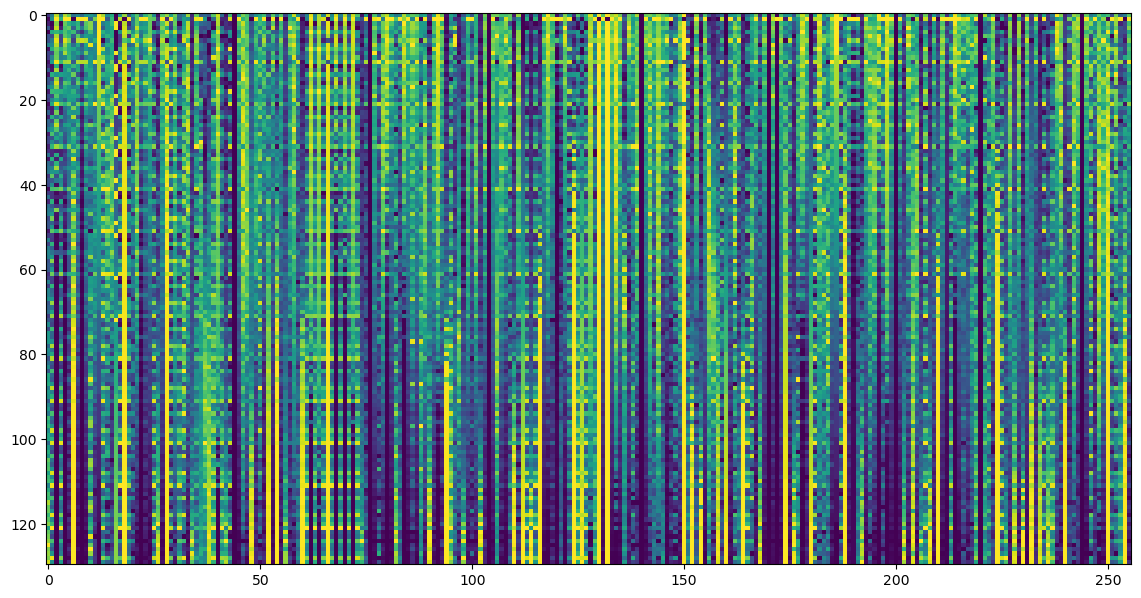

In [10]:
dft = pd.concat(v, axis=0)

scaler = MinMaxScaler()
dft = pd.DataFrame(scaler.fit_transform(dft), columns=dft.columns)

plt.figure(figsize=(14, 10))
plt.imshow(dft)